In [1]:
import numpy as np
from matplotlib import(
    pyplot as plt,
    image as mpim,
)
import cv2 as cv

%matplotlib inline

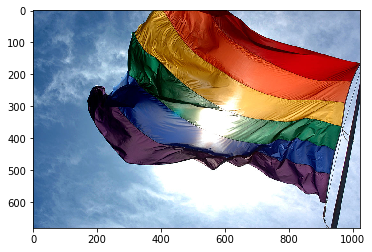

In [2]:
img = mpim.imread('images/rainbow_flag.jpg')
#img = cv.imread('images/rainbow_flag.jpg', cv.IMREAD_COLOR)
#img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

# Image Pyramids

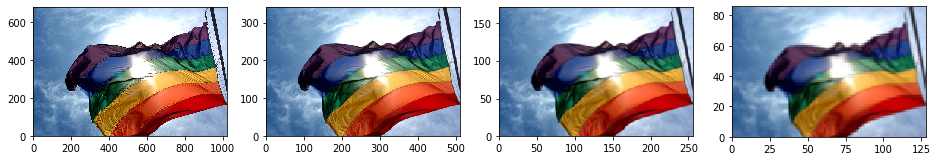

In [3]:
levels = [img]

_, axi = plt.subplots(1, 4, figsize=(16, 4))

for i, ax in enumerate(axi.flat):
    levels.append(cv.pyrDown(levels[-1]))
    level_im = levels[i]
    y, x = level_im.shape[0:2]
    ax.set_xlim([0, x])
    ax.set_ylim([0, y])
    ax.imshow(level_im)

plt.show()

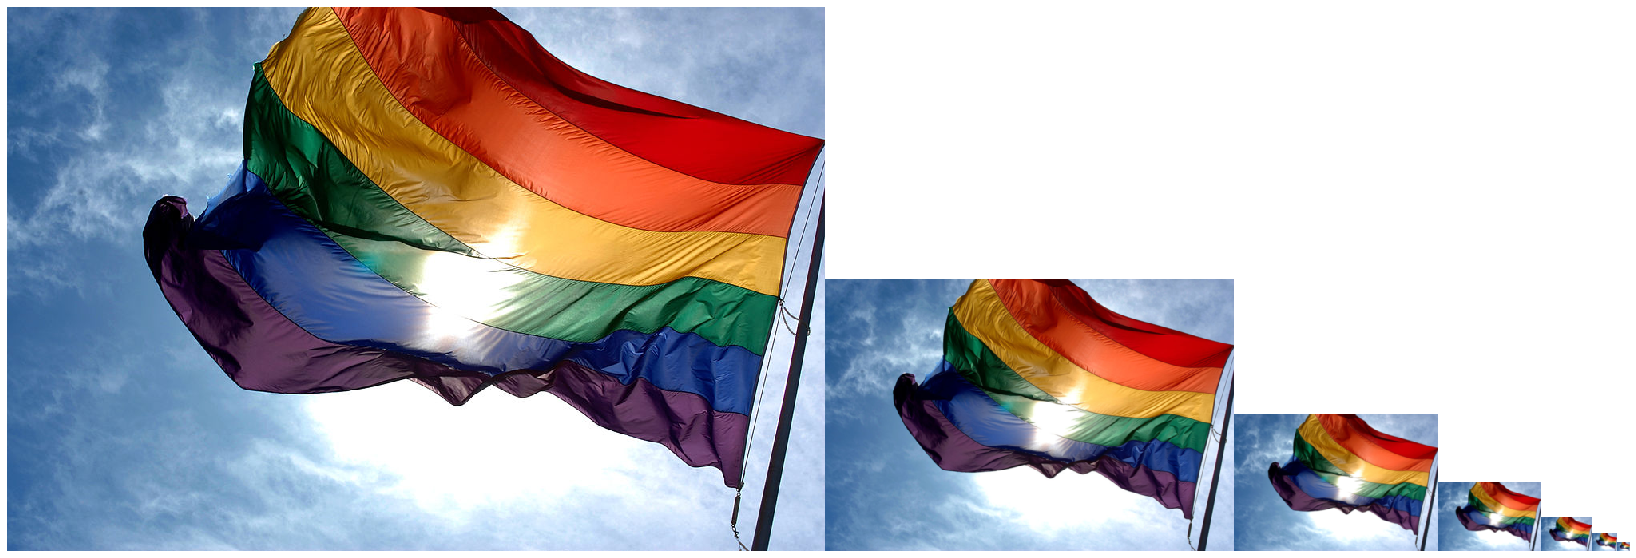

In [4]:
num_levels = 6
# image dimension are required to fill white space
imy, imx = img.shape[0:2]

levels = [img]
# this list will turn into a horizontally stacked image composition
comp = [img]

for i in range(num_levels):
    pyr_im = cv.pyrDown(levels[-1])
    piy, pix = pyr_im.shape[0:2]
    
    # create a white space which will be vertically stacked with the down sampled image
    white = np.full((imy-piy, pix, 3), 255)
    
    levels.append(pyr_im)
    comp.append(np.vstack([white, pyr_im]))
    
comp = np.hstack(comp)

plt.figure(figsize=(30, 10))
plt.imshow(comp)
plt.axis('off')
plt.show()